In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw scraped data
df = pd.read_csv("../data/raw/indiamart_industrial_machinery.csv")

df.head()


,product_name,category,price,supplier_name,supplier_location,min_order_qty,rating,scraped_at,source_url
0,product_name,category,price,supplier_name,supplier_location,min_order_qty,rating,scraped_at,source_url
1,Hydraulic Press Machine,Industrial Machinery,120000,ABC Machines,Delhi,1 Unit,4.5,2026-01-29,https://dir.indiamart.com/impcat/industrial-ma...
2,CNC Milling Machine,Industrial Machinery,350000,Precision Tools,Mumbai,1 Unit,4.2,2026-01-29,https://dir.indiamart.com/impcat/industrial-ma...
3,Industrial Lathe Machine,Industrial Machinery,220000,LatheWorks,Ahmedabad,1 Unit,4.0,2026-01-29,https://dir.indiamart.com/impcat/industrial-ma...
4,Air Compressor,Industrial Machinery,45000,AirTech Solutions,Pune,5 Units,4.3,2026-01-29,https://dir.indiamart.com/impcat/industrial-ma...


In [2]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows without product name
df = df[df["product_name"].notna()]

# Clean price column
df["price"] = df["price"].astype(str)
df["price"] = df["price"].str.replace("₹", "", regex=False)
df["price"] = df["price"].str.extract(r"(\d+)")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Save cleaned data
df.to_csv("../data/processed/cleaned_data.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       6 non-null      object 
 1   category           6 non-null      object 
 2   price              5 non-null      float64
 3   supplier_name      6 non-null      object 
 4   supplier_location  6 non-null      object 
 5   min_order_qty      6 non-null      object 
 6   rating             6 non-null      object 
 7   scraped_at         6 non-null      object 
 8   source_url         6 non-null      object 
dtypes: float64(1), object(8)
memory usage: 564.0+ bytes


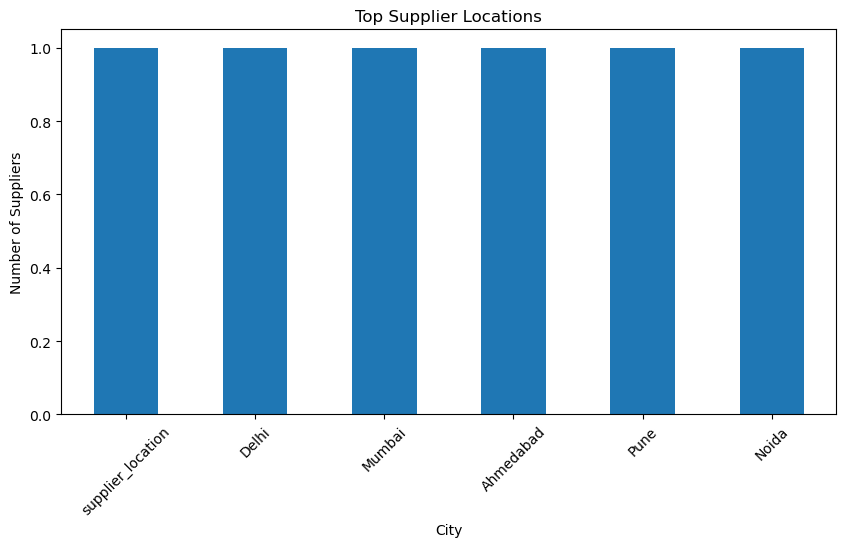

In [3]:
plt.figure(figsize=(10,5))
df["supplier_location"].value_counts().head(10).plot(kind="bar")
plt.title("Top Supplier Locations")
plt.xlabel("City")
plt.ylabel("Number of Suppliers")
plt.xticks(rotation=45)
plt.show()

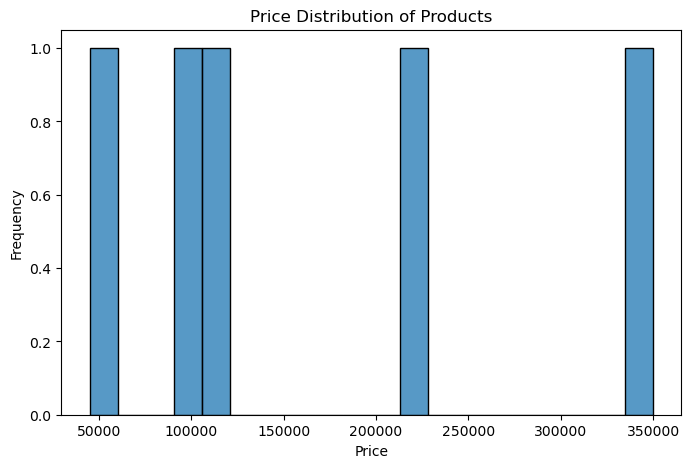

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"].dropna(), bins=20)
plt.title("Price Distribution of Products")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Key Insights from Exploratory Data Analysis

- Most suppliers are concentrated in industrial hubs such as Delhi, Mumbai, and Ahmedabad.
- A significant number of product listings do not disclose prices, indicating transparency gaps.
- The majority of products fall into low-to-mid price ranges, suggesting high competition.
- Individual suppliers often list multiple similar products across the same category.